Reading EX2GK equilibrium information to Equilibrium...
Adding derived quantities to Equilibrium...
Adding fluxsurfaces to Equilibrium...
 100% completed
tracer time:0.010s / flux-surface
analytic extraction time:0.000s / flux-surface
Optimising parameterization fit of fluxsurfaces...
 100% completed
Optimization time:0.079s / flux-surface
Total fitting time:0.554s
Number of points on reference flux-surface: 34
Computing analytical Miller geometry quantities...
[3.06945644 0.31228452 0.03961273 1.38096004 0.0047143 ]
chi^2: 0.00000
reduced chi^2: 0.00080
Adding fluxsurfaces to Equilibrium...
 100% completed
tracer time:0.020s / flux-surface
analytic extraction time:0.001s / flux-surface
Optimising parameterization fit of fluxsurfaces...
 100% completed
Optimization time:0.091s / flux-surface
Total fitting time:0.635s
Number of points on reference flux-surface: 100
Computing analytical Miller geometry quantities...
[3.06678179 0.3115327  0.12814621 1.36096854 0.02350488]
chi^2: 0.00001


(0.0, 10.0)

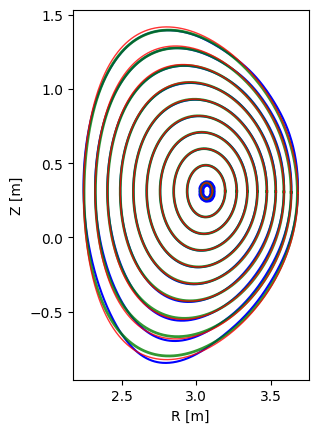

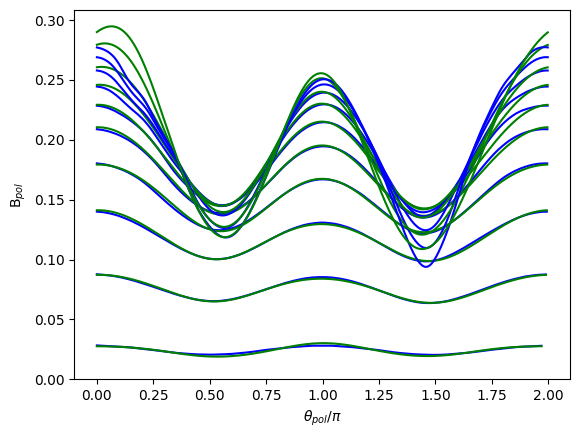

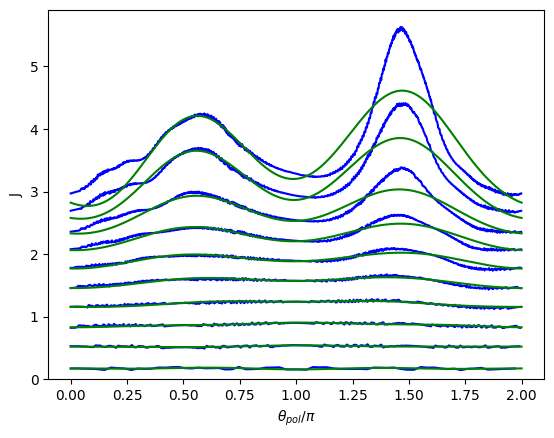

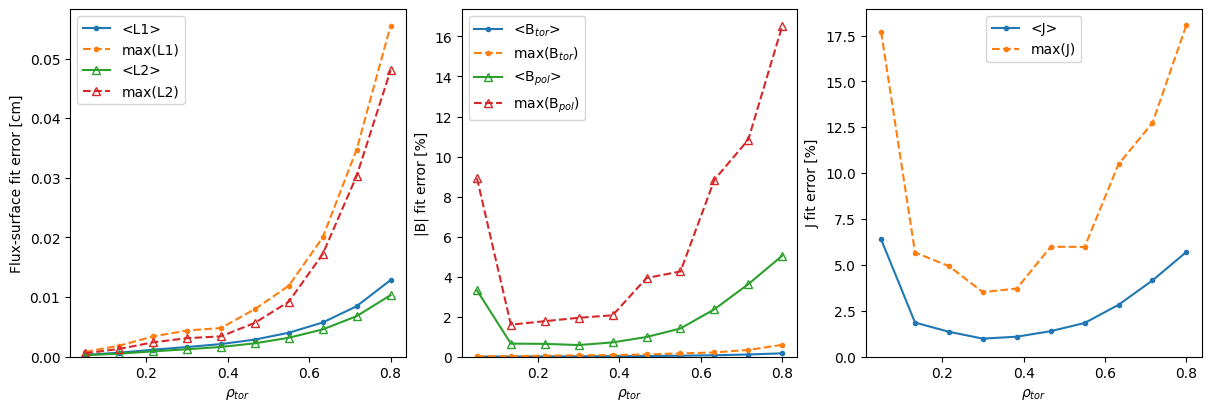

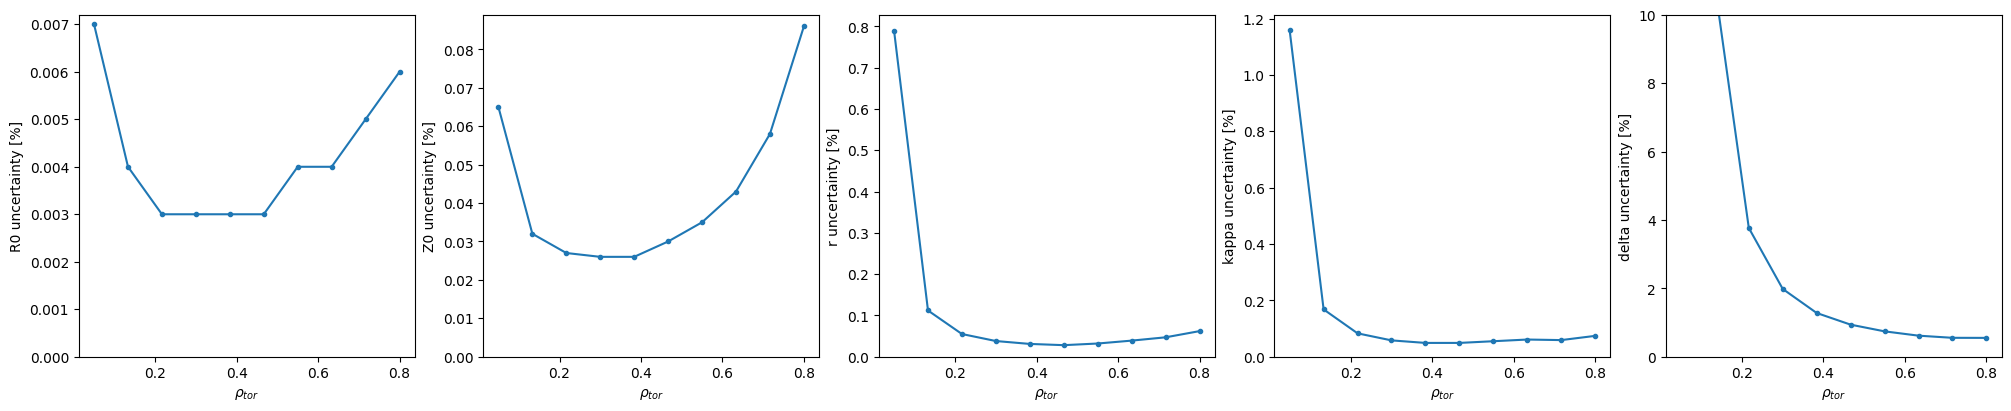

In [1]:
import megpy
import matplotlib.pyplot as plt
import numpy as np

rho_fs = 0.1
rho_list = np.linspace(0.05,0.8,10)#[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]
n_x = 7
param = 'miller'
opt_bpol = False
opt_deriv = False
print_tglf = False
print_shape = True

f_path = '../data/S069951_T01.pkl'

eq = megpy.Equilibrium()
#eq.verbose = False
eq.read_ex2gk_pkl(f_path,use_fitted=False)
eq.add_derived(refine=4)

fit_error_data = {'avg':{'l1':[],'l2':[],'btor':[],'bpol':[],'j':[]},'max':{'l1':[],'l2':[],'btor':[],'bpol':[],'j':[]}}
shape_uq_data = {'R0':[],'Z0':[],'r':[],'kappa':[],'delta':[],'zeta':[]}

for rho_fs in rho_list:
    #print('rho = {}'.format(rho_fs))
    locgeo = megpy.LocalEquilibrium(param,eq,rho_fs,
                                    analytic_shape=True,
                                    n_x=n_x,
                                    n_harmonics=6,
                                    n_theta='default',
                                    opt_bpol=opt_bpol,
                                    opt_deriv=opt_deriv,
                                    diag_lsq=0,
                                    verbose=True)
    
    dR_refdr, dR_refdtheta = np.gradient(np.array(locgeo.eq.fluxsurfaces['fit_geo']['R_ref']),locgeo.eq.fluxsurfaces['fit_geo']['r'],locgeo.theta)
    locgeo.dR_refdr, locgeo.dR_refdtheta = dR_refdr[locgeo.x_grid.index(locgeo.x_loc)], dR_refdtheta[locgeo.x_grid.index(locgeo.x_loc)]

    dZ_refdr, dZ_refdtheta = np.gradient(np.array(locgeo.eq.fluxsurfaces['fit_geo']['Z_ref']),locgeo.eq.fluxsurfaces['fit_geo']['r'],locgeo.theta)
    locgeo.dZ_refdr, locgeo.dZ_refdtheta = dZ_refdr[locgeo.x_grid.index(locgeo.x_loc)], dZ_refdtheta[locgeo.x_grid.index(locgeo.x_loc)]

    locgeo.Jr_ref = locgeo.R_ref[:-1]*(locgeo.dR_refdr*locgeo.dZ_refdtheta-locgeo.dR_refdtheta*locgeo.dZ_refdr)

    if print_tglf:
        print('\nTGLF input for rho={}'.format(rho_fs))
        locgeo.printer('TGLF',locgeo.shape,locgeo.param_labels,locgeo.shape_deriv,locgeo.deriv_labels)
        print('\n')
    
    if print_shape:
        print(locgeo.shape)
        #print(locgeo.shape_deriv)

    # diagnostic information
    n_theta = len(locgeo.R_ref)
    fit_error_data['avg']['l1'].append(np.sum((np.abs(locgeo.R_param[~np.isnan(locgeo.R_ref)]-locgeo.R_ref[~np.isnan(locgeo.R_ref)])+np.abs(locgeo.Z_param[~np.isnan(locgeo.R_ref)]-locgeo.Z_ref[~np.isnan(locgeo.R_ref)])))/n_theta)
    fit_error_data['avg']['l2'].append(np.sum(np.sqrt((locgeo.R_param[~np.isnan(locgeo.R_ref)]-locgeo.R_ref[~np.isnan(locgeo.R_ref)])**2+(locgeo.Z_param[~np.isnan(locgeo.R_ref)]-locgeo.Z_ref[~np.isnan(locgeo.R_ref)])**2))/n_theta)
    fit_error_data['avg']['btor'].append(np.sum(100*np.abs((locgeo.Bt_param-locgeo.Bt_ref)/locgeo.Bt_ref))/n_theta)
    fit_error_data['avg']['bpol'].append(np.sum(100*np.abs((locgeo.Bp_param-locgeo.Bp_ref)/locgeo.Bp_ref))/n_theta)
    fit_error_data['avg']['j'].append(np.sum(100*np.abs((locgeo.J_r_param-locgeo.Jr_ref)/locgeo.Jr_ref))/n_theta)

    fit_error_data['max']['l1'].append(np.max((np.abs(locgeo.R_param[~np.isnan(locgeo.R_ref)]-locgeo.R_ref[~np.isnan(locgeo.R_ref)])+np.abs(locgeo.Z_param[~np.isnan(locgeo.R_ref)]-locgeo.Z_ref[~np.isnan(locgeo.R_ref)]))))
    fit_error_data['max']['l2'].append(np.max(np.sqrt((locgeo.R_param[~np.isnan(locgeo.R_ref)]-locgeo.R_ref[~np.isnan(locgeo.R_ref)])**2+(locgeo.Z_param[~np.isnan(locgeo.R_ref)]-locgeo.Z_ref[~np.isnan(locgeo.R_ref)])**2)))
    fit_error_data['max']['btor'].append(np.max(100*np.abs((locgeo.Bt_param-locgeo.Bt_ref)/locgeo.Bt_ref)))
    fit_error_data['max']['bpol'].append(np.max(100*np.abs((locgeo.Bp_param-locgeo.Bp_ref)/locgeo.Bp_ref)))
    fit_error_data['max']['j'].append(np.max(100*np.abs((locgeo.J_r_param-locgeo.Jr_ref)/locgeo.Jr_ref)))

    #shape_uq = np.round(100*np.abs((np.array(locgeo.shape)-np.array(locgeo.shape_analytic))/np.array(locgeo.shape)),2)
    shape_uq = np.round((np.sqrt(np.diag(locgeo.shape_cov))/locgeo.shape)*100,3)

    for i_key,key in enumerate(locgeo.param_labels):
        shape_uq_data[key].append(shape_uq[i_key])
    
    print('chi^2: {:.5f}'.format(locgeo.chi_2))
    print('reduced chi^2: {:.5f}'.format(locgeo.chi_2_nu))

    # plot fitted flux-surfaces and Bpol
    plt.figure(0)
    if len(locgeo.R_ref)<150:
        plt.plot(locgeo.R_ref,locgeo.Z_ref,'b.-',zorder=1,label='Reference')
    else:
        plt.plot(locgeo.R_ref,locgeo.Z_ref,'b-',zorder=1,label='Reference')
    plt.plot(locgeo.R_param,locgeo.Z_param,'g-',zorder=2,lw=2,alpha=0.8,label='Miller opt.')
    plt.plot(locgeo.R_geo,locgeo.Z_geo,'r-',zorder=2,lw=1,alpha=0.8,label='Miller analytical')
    plt.axis('scaled')
    plt.xlabel('R [m]')
    plt.ylabel('Z [m]')

    plt.figure(1)
    plt.plot(locgeo.theta[:-1]/np.pi,locgeo.Bp_ref[:-1],'b-')
    plt.plot(locgeo.theta[:-1]/np.pi,locgeo.Bp_param[:-1],'g-')
    plt.xlabel('$\\theta_{pol}/\\pi$')
    plt.ylabel('B$_{pol}$')

    plt.figure(2)
    plt.plot(locgeo.theta[:-1]/np.pi,locgeo.Jr_ref[:-1],color='blue')
    plt.plot(locgeo.theta/np.pi,locgeo.J_r_param,color='green')
    plt.xlabel('$\\theta_{pol}/\\pi$')
    plt.ylabel('J')
    
plt.figure(1)
plt.ylim(bottom=0)

plt.figure(2)
plt.ylim(bottom=0)

# plot L1, L2, Btor and Bpol flux-surface average and maximum parametetization errors
fig, axes = plt.subplots(1,3,constrained_layout=True,figsize=(12,4))
axes[0].plot(rho_list,fit_error_data['avg']['l1'],'.-',label='<L1>')
axes[0].plot(rho_list,fit_error_data['max']['l1'],'.--',label='max(L1)')
axes[0].plot(rho_list,fit_error_data['avg']['l2'],'^-',label='<L2>',markerfacecolor='none')
axes[0].plot(rho_list,fit_error_data['max']['l2'],'^--',label='max(L2)',markerfacecolor='none')
axes[0].set_ylim(bottom=0)
axes[0].legend()
axes[0].set_xlabel('$\\rho_{tor}$')
axes[0].set_ylabel('Flux-surface fit error [cm]')

axes[1].plot(rho_list,fit_error_data['avg']['btor'],'.-',label='<B$_{tor}$>')
axes[1].plot(rho_list,fit_error_data['max']['btor'],'.--',label='max(B$_{tor}$)')
axes[1].plot(rho_list,fit_error_data['avg']['bpol'],'^-',label='<B$_{pol}$>',markerfacecolor='none')
axes[1].plot(rho_list,fit_error_data['max']['bpol'],'^--',label='max(B$_{pol}$)',markerfacecolor='none')
axes[1].set_ylim(bottom=0)
axes[1].legend()
axes[1].set_xlabel('$\\rho_{tor}$')
axes[1].set_ylabel('|B| fit error [%]')

axes[2].plot(rho_list,fit_error_data['avg']['j'],'.-',label='<J>')
axes[2].plot(rho_list,fit_error_data['max']['j'],'.--',label='max(J)')
axes[2].set_ylim(bottom=0)
axes[2].legend()
axes[2].set_xlabel('$\\rho_{tor}$')
axes[2].set_ylabel('J fit error [%]')

# plot percentage differences of the geometric (analytic) flux-surface average shaping coefficients compared to the fitted to provide uncertainty estimate
fig, axes = plt.subplots(1,len(locgeo.param_labels),constrained_layout=True,figsize=(4*len(locgeo.param_labels),4))
for i_key,key in enumerate(locgeo.param_labels):
    axes[i_key].plot(rho_list,shape_uq_data[key],'.-')
    axes[i_key].set_ylabel('{} uncertainty [%]'.format(key))
    axes[i_key].set_xlabel('$\\rho_{tor}$')
    axes[i_key].set_ylim(bottom=0)
axes[-1].set_ylim(0,10)